# **Graduation Project -- Spinny Revenue Growth Analysis**
---
### **Structured Notebook Design**
This notebook follows a modular design:
- **Introduction**
- **Dataset Overview**
- **Data Understanding**
- **Data Preparation**
- **Feature Engineering**
- **Exploratory Data Analysis (EDA)**
- **Hypothesis Testing**
- **Key Findings and Recommendations**

### **1. Importing Necessary Libraries**
---

In [158]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr, chi2_contingency

### **2. Introduction**
Spinny, a leading Indian startup in the pre-owned car market, aims to boost revenue by optimizing car demand and pricing strategies. This analysis focuses on identifying demand patterns, key car attributes, and pricing strategies to support growth.

### **3. Dataset Overview**
#### Columns and Metrics
- **ID (Transaction ID)**: A unique identifier for each car transaction in the dataset.
- **Price**: The final selling price of the vehicle in Indian Rupees (INR).
- **Year**: The year of manufacture of the vehicle, indicating its age.
- **Manufacturer**: The brand or company that produced the vehicle.
- **Model**: The specific model name of the vehicle produced by the manufacturer.
- **Condition**: The physical and operational state of the vehicle at the time of sale.
- **Cylinders**: The number of cylinders in the car's engine, influencing its power and performance.
- **Fuel**: The type of fuel the vehicle uses, such as petrol, diesel, CNG, or electric.
- **Odometer**: The total distance the vehicle has traveled, measured in kilometers.
- **Title Status**: The condition of the car’s title, indicating if it is clean, has missing parts, or has liens.
- **VIN (Vehicle Identification Number)**: A unique serial number assigned to each vehicle for identification.
- **Drive**: The drivetrain configuration of the vehicle (e.g., front-wheel drive, rear-wheel drive).
- **Size**: The size classification of the vehicle, such as compact, midsize, or full-size.
- **Type**: The type of vehicle, such as sedan, SUV, hatchback, or truck.
- **Paint Color**: The exterior color of the vehicle.
- **Image URL**: A link to an image of the vehicle for reference.
- **State**: The Indian state where the car transaction took place.
- **Posting Date**: The date when the car was listed for sale.
- **Latitude**: The geographical latitude coordinate of the transaction location.
- **Longitude**: The geographical longitude coordinate of the transaction location.

### **4. Loading the Dataset**
---

In [159]:


# Step 3: Set the file ID and create a download URL
file_id = "1QQaRZizuq3TGhUqHyIc701ChT-GgM1yR"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
output_file = "spinny_dataset.csv"

# Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame
data = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1QQaRZizuq3TGhUqHyIc701ChT-GgM1yR
To: /content/spinny_dataset.csv
100%|██████████| 99.9M/99.9M [00:00<00:00, 170MB/s]


### **5. Data Understanding**
#### Basic Information
---

In [160]:
# Dataset info
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   price         426880 non-null  float64
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  image_url     426812 non-null  object 
 17  state         426880 non-null  obj

In [161]:
# Missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 id                   0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
state                0
posting_date        68
latitude             0
longitude            0
dtype: int64


In [162]:
# Percentage of null values
null_percentage = round((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)
print("\nPercentage of Null Values by Column (Descending):\n", null_percentage)


Percentage of Null Values by Column (Descending):
 size            72.0
cylinders       42.0
condition       41.0
VIN             38.0
drive           31.0
paint_color     31.0
type            22.0
manufacturer     4.0
title_status     2.0
transmission     1.0
model            1.0
fuel             1.0
odometer         1.0
state            0.0
latitude         0.0
posting_date     0.0
id               0.0
image_url        0.0
price            0.0
year             0.0
longitude        0.0
dtype: float64


#### Missing Data Heatmap
---

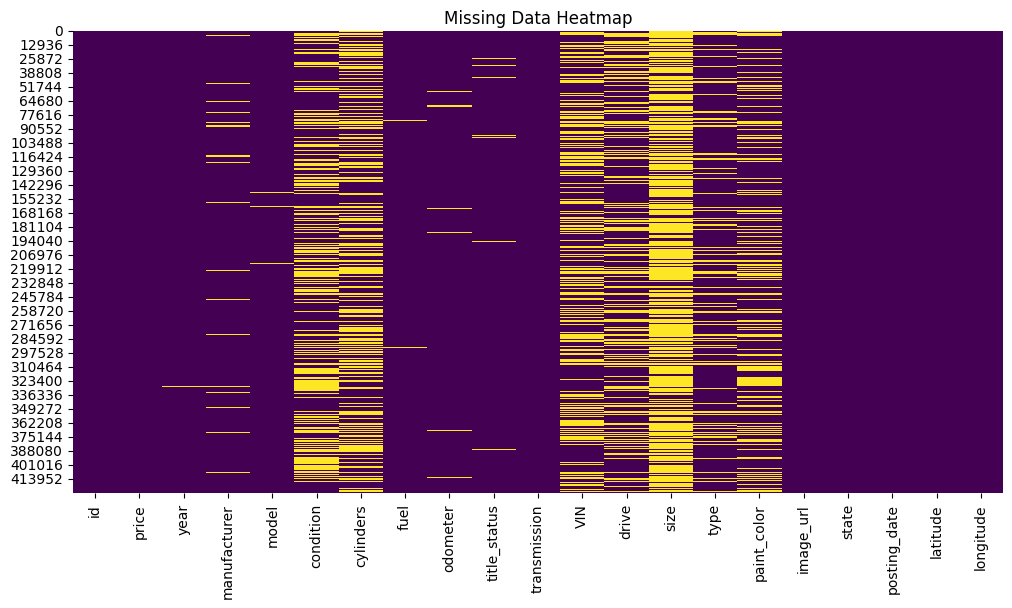

In [163]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

### **6. Data Preparation**
#### Dropping Irrelevant Columns
---

In [164]:
columns_to_drop = ['size', 'VIN']
print(f"Dropping columns: {columns_to_drop}")
data = data.drop(columns=columns_to_drop, axis=1)

Dropping columns: ['size', 'VIN']


### **Handling Missing Values**
---
Here, we handle missing values in various columns by applying logical strategies such as mode imputation, mapping relationships, and filling defaults where applicable.

In [165]:
# Filling missing values for `cylinders`, `condition`, `paint_color`, drive,`type`,'title_status'
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].mode()[0])
data['condition'] = data['condition'].fillna('Unknown')
data['paint_color'] = data['paint_color'].fillna('Unknown')
data['type'] = data['type'].fillna('Unknown')
data['fuel'] = data['fuel'].fillna(data['fuel'].mode()[0])
data['transmission'] = data['transmission'].fillna(data['transmission'].mode()[0])
data['drive'] = data['drive'].fillna(data['drive'].mode()[0])
data['title_status'] = data['title_status'].fillna(data['title_status'].mode()[0])



In [ ]:
# Filling missing values for `manufacturer` based on most common manufacturer for each `model`
model_to_manufacturer = data.groupby('model')['manufacturer'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()
data['manufacturer'] = data.apply(
    lambda row: model_to_manufacturer[row['model']] if pd.isnull(row['manufacturer']) and row['model'] in model_to_manufacturer else row['manufacturer'],
    axis=1
)
data['manufacturer'] = data['manufacturer'].fillna(data['manufacturer'].mode()[0])

# Filling missing values for `model` based on most common model for each `manufacturer`
manufacturer_to_model = data.groupby('manufacturer')['model'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()
data['model'] = data.apply(
    lambda row: manufacturer_to_model[row['manufacturer']] if pd.isnull(row['model']) and row['manufacturer'] in manufacturer_to_model else row['model'],
    axis=1
)
data['model'] = data['model'].fillna(data['model'].mode()[0])


### **Handling Outliers and Missing Values for Price and Odometer**
---

- Handled missing values before outliers to ensure correct threshold calculations.  
- **Price:**  
  - Filled missing values using median per manufacturer & model, then overall median.  
  - Removed extreme outliers below 1st percentile & above 99th percentile.  
- **Odometer:**  
  - Filled missing values using median per manufacturer & fuel type, then overall median.  
  - Removed unrealistic values below 1,000 km & above 300,000 km.  

This approach maintains data accuracy while removing noise and inconsistencies.  


In [166]:
# Step 1: Filling missing values before handling outliers and removing invalid values such as 0

data = data[data['price'] > 0]

# Filling missing price with median price per manufacturer & model
price_median_map = data.groupby(['manufacturer', 'model'])['price'].median().to_dict()
data['price'] = data.apply(
    lambda row: price_median_map.get((row['manufacturer'], row['model']), row['price']) if pd.isnull(row['price']) else row['price'],
    axis=1
)

# If still missing, Filling with overall median price
overall_median_price = data['price'].median()
data['price'] = data['price'].fillna(overall_median_price)

# Filling missing odometer with median per manufacturer & fuel type
odometer_median_map = data.groupby(['manufacturer', 'fuel'])['odometer'].median().to_dict()
data['odometer'] = data.apply(
    lambda row: odometer_median_map.get((row['manufacturer'], row['fuel']), row['odometer']) if pd.isnull(row['odometer']) else row['odometer'],
    axis=1
)

# If still missing, Filling with overall median odometer
overall_median_odometer = data['odometer'].median()
data['odometer'] = data['odometer'].fillna(overall_median_odometer)

# Step 2: Applying outlier removal after handling missing values

# Define realistic lower and upper bounds for price and odometer
price_lower_bound = data['price'].quantile(0.01)  # Remove bottom 1%
price_upper_bound = data['price'].quantile(0.99)  # Remove top 1%

odometer_lower_bound = 1000  # Assumed no used car has <1000 km
odometer_upper_bound = 300000  # Assumed no normal used car has >300K km

# Removing extreme outliers
data = data[
    (data['price'] >= price_lower_bound) & (data['price'] <= price_upper_bound) &
    (data['odometer'] >= odometer_lower_bound) & (data['odometer'] <= odometer_upper_bound)
]


In [167]:
data['price'].max()

8832260.0

#### Handling Missing Values in "year" and "posting_date"



### **Adjusting Data Types**
---
Ensure that all columns have appropriate data types for optimized storage and analysis.

In [168]:
# Convert `posting_date` to datetime
if 'posting_date' in data.columns:
    data['posting_date'] = pd.to_datetime(data['posting_date'], errors='coerce')

# Convert `year` to integer
if 'year' in data.columns:
    data['year'] = pd.to_numeric(data['year'], errors='coerce')


#### **Handling Missing Values and Outliers for year and posting_date**

#### **Why Fix "Year" and "Posting Date"?**
- **"year" is crucial** for determining vehicle age (`car_age`).
- **"posting_date" provides context** for when the listing was made, helping validate the "year" column.
- Some **"year" values were greater than the max posting date (2021)**, which is logically incorrect.

In [169]:

# Step 1: Filling missing 'year' based on the most common year for each 'model'
model_to_year = data.groupby('model')['year'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()
data['year'] = data.apply(
    lambda row: model_to_year.get(row['model'], row['year']) if pd.isnull(row['year']) else row['year'],
    axis=1
)

# Step 2: Filling remaining missing 'year' based on manufacturer + fuel type (more specific than just manufacturer)
manufacturer_fuel_to_year = data.groupby(['manufacturer', 'fuel'])['year'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()
data['year'] = data.apply(
    lambda row: manufacturer_fuel_to_year.get((row['manufacturer'], row['fuel']), row['year']) if pd.isnull(row['year']) else row['year'],
    axis=1
)

# Step 3: If still missing, used dataset median
median_year = data['year'].median()
data['year'] = data['year'].fillna(median_year)

# Step 4: Ensure 'year' is within valid range (1980-2021)
# Also, adjusted 'year' if it's greater than the car's posting date
data['posting_date'] = pd.to_datetime(data['posting_date'], errors='coerce')
data['year'] = data.apply(
    lambda row: min(row['year'], row['posting_date'].year) if not pd.isnull(row['posting_date']) else row['year'],
    axis=1
)
data['year'] = data['year'].clip(lower=1980, upper=2021)


# Step 5: Handling missing 'posting_date' (optional)
# If needed, fill missing 'posting_date' with the most common date
most_common_posting_date = data['posting_date'].mode()[0] if not data['posting_date'].mode().empty else None
data['posting_date'] = data['posting_date'].fillna(most_common_posting_date)


##### **Steps Taken to Fix "Year"**
1. **Converted "year" to numeric** – Ensured correct datatype.
2. **Filled missing "year" based on "model" mode** – Cars of the same model often shared similar manufacturing years.
3. **Filled remaining missing "year" based on "manufacturer" mode** – As a fallback, used the most frequent year per manufacturer.
4. **Filled any remaining missing values with the median "year"** – Ensured no missing values remained.
5. **Capped "year" at 2021** – Since the latest posting date was 2021, there could not be future car years.
6. **Recalculated "car_age" as `2021 - year`** – Instead of 2022, since the dataset's max posting date was 2021.

##### **Steps Taken to Fix "Posting Date"**
1. **Converted "posting_date" to datetime** – Ensured correct datatype.
2. **Filled missing "posting_date" with the most common date (mode)** – Avoided losing valuable records due to missing dates.


##### **Final Outcome**
- Ensures "year" is accurate and within the correct range.  
- Prevents future-dated cars from appearing in the dataset.  
- Ensures "car_age" reflects the latest available data (2021).  
- Maintains data consistency for better analysis.


### **Data Validation**
---
Verify that all missing values are handled, and data types are correctly updated.

In [153]:
# Check for remaining missing values
print("Remaining Missing Values:\n", data.isnull().sum())


Remaining Missing Values:
 id               0
price            0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
title_status     0
transmission     0
drive            0
type             0
paint_color      0
image_url       68
state            0
posting_date     0
latitude         0
longitude        0
dtype: int64

Updated Data Types:
 id                            int64
price                       float64
year                        float64
manufacturer                 object
model                        object
condition                    object
cylinders                    object
fuel                         object
odometer                    float64
title_status                 object
transmission                 object
drive                        object
type                         object
paint_color                  object
image_url                    object
state                        object
p

In [ ]:
# Validate updated data types
print("\nUpdated Data Types:\n", data.dtypes)

In [173]:
data['price'].max()

8832260.0

In [171]:
data.to_csv('/content/drive/MyDrive/Spinny_data/cleaned_dataset.csv')

### **7. Feature Engineering**
#### New Features Added
---
- **Depreciation Rate**: Depreciation of the car based on its age and price.
- **Car Age**: Age of the car based on the manufacturing year.
- **Regional Price Index**: Price of the car compared to the average price in the same region.
- **Transaction Volume per Region**: Percentage share of transactions by state.

In [174]:
data['car_age'] = 2021 - data['year']
data['depreciation_rate'] = data['price'] / (data['car_age'] + 1)


state_avg_price = data.groupby('state')['price'].transform('mean')
data['regional_price_index'] = data['price'] / state_avg_price

data['state_transaction_share'] = data['state'].map(data['state'].value_counts(normalize=True))

### **8. Exploratory Data Analysis (EDA)**
#### Enhanced EDA with Segmentation, Cohorts, and Q&A
---

#### 1. Price Distribution Across Key Metrics
---
**Question**: What is the overall distribution of car prices?

**Insight**: Helps in understanding the range and central tendencies of the prices.
---

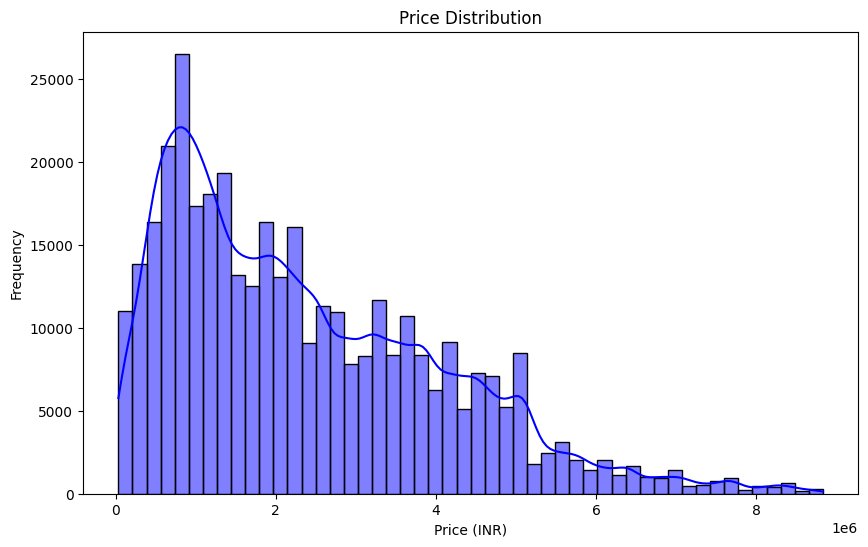

In [175]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

#### 2. Price by Fuel Type
---
**Question**: How does price vary across different fuel types?
**Insight**: Highlights fuel types commanding premium prices.
---

<ipython-input-176-7ca07599379e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='price', data=data, palette='muted')


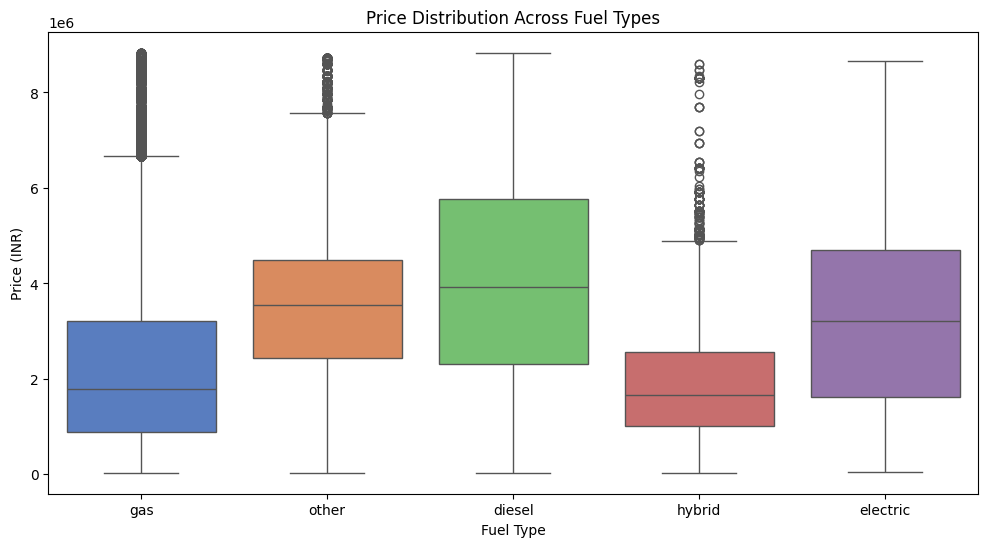

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel', y='price', data=data, palette='muted')
plt.title('Price Distribution Across Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()

#### 3. Transaction Volume by State
---
**Question**: Which states have the highest number of transactions?
**Insight**: Identifies regions with the most activity for targeted strategies.
---

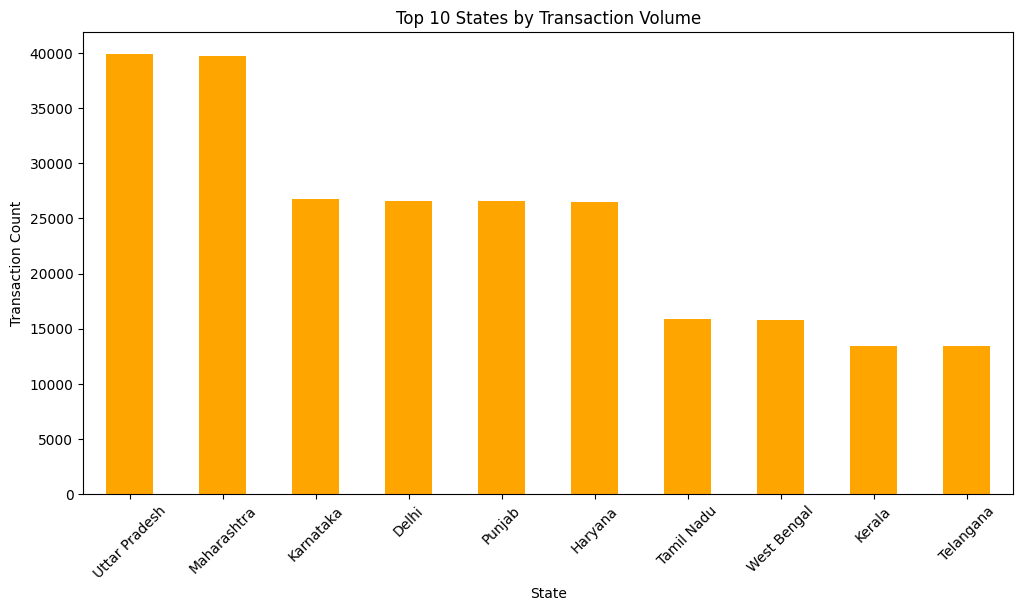

In [177]:
plt.figure(figsize=(12, 6))
data['state'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 States by Transaction Volume')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

#### 4. Median Price by Manufacturer
---
**Question**: Which manufacturers command the highest median price?
**Insight**: Identifies premium manufacturers for segmentation.
---

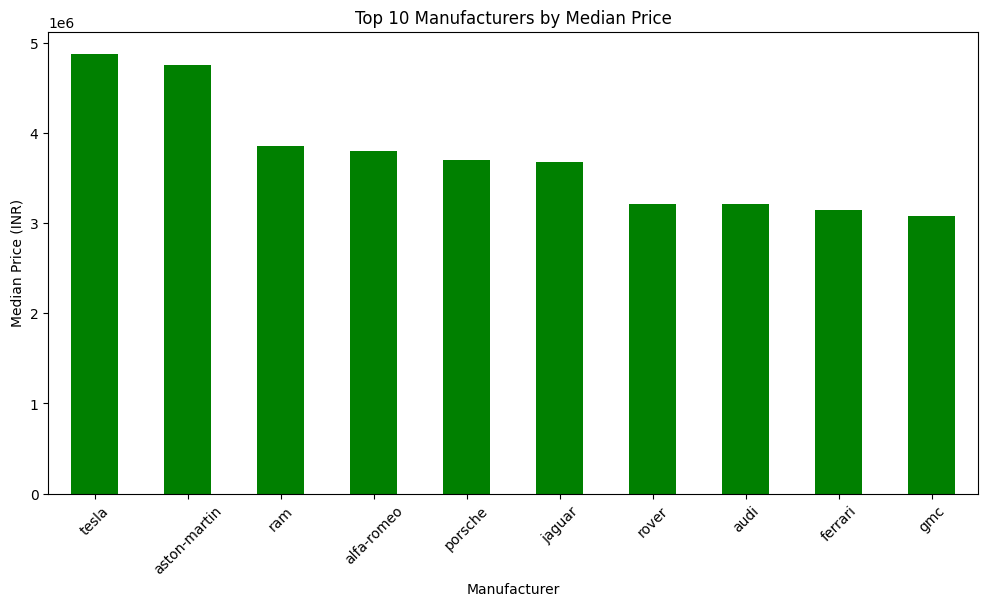

In [178]:
plt.figure(figsize=(12, 6))
data.groupby('manufacturer')['price'].median().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Top 10 Manufacturers by Median Price')
plt.xlabel('Manufacturer')
plt.ylabel('Median Price (INR)')
plt.xticks(rotation=45)
plt.show()

#### 5. Odometer Insights by Car Type
---
**Question**: How does odometer reading vary by car type?
**Insight**: Highlights car types with higher usage patterns.
---

<ipython-input-179-edebefbce77a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='odometer', data=data, palette='cool')


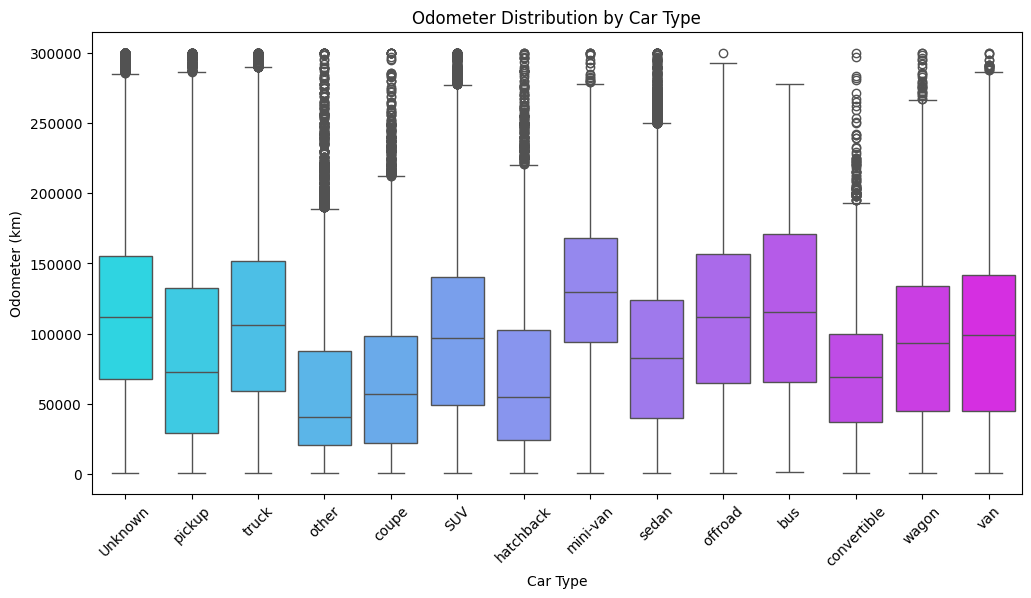

In [179]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='odometer', data=data, palette='cool')
plt.title('Odometer Distribution by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Odometer (km)')
plt.xticks(rotation=45)
plt.show()

#### 6. Depreciation Trends by Car Age
---
**Question**: How does car age affect price depreciation?
**Insight**: Reveals the rate of depreciation over time.
---

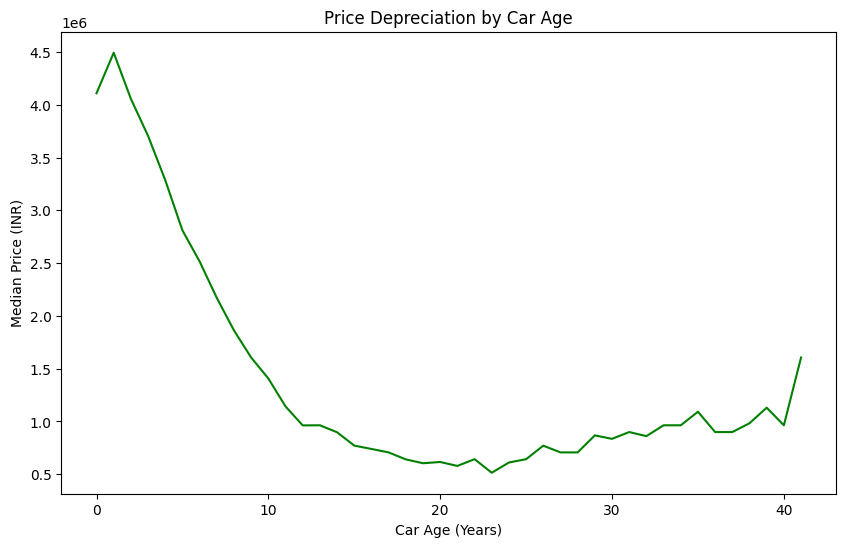

In [180]:
plt.figure(figsize=(10, 6))
data.groupby('car_age')['price'].median().plot(kind='line', color='green')
plt.title('Price Depreciation by Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Median Price (INR)')
plt.show()

#### 7. Price vs Odometer Scatter Plot
---
**Question**: What is the relationship between price and odometer reading?
**Insight**: Shows how mileage impacts price.
---

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


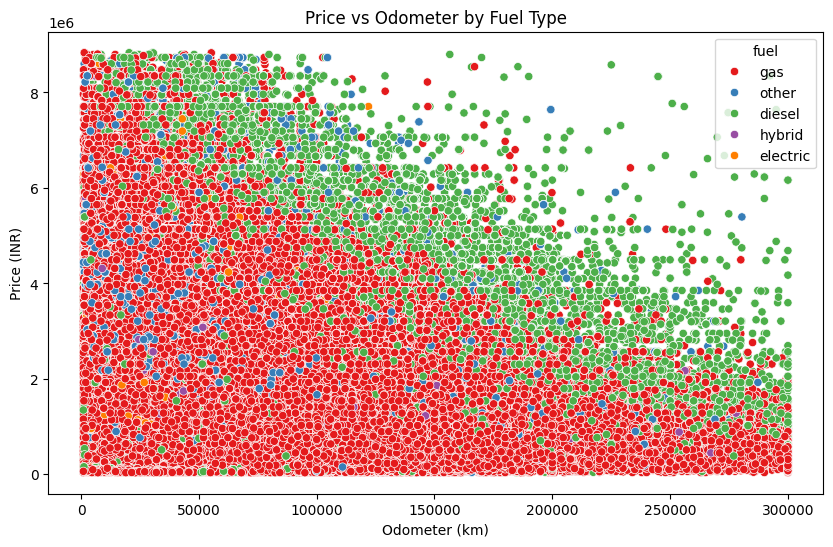

In [181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', hue='fuel', data=data, palette='Set1')
plt.title('Price vs Odometer by Fuel Type')
plt.xlabel('Odometer (km)')
plt.ylabel('Price (INR)')
plt.show()

#### 8. Regional Price Index Analysis
---
**Question**: Which states have the highest average regional price index?
**Insight**: Highlights states with premium car markets.
---

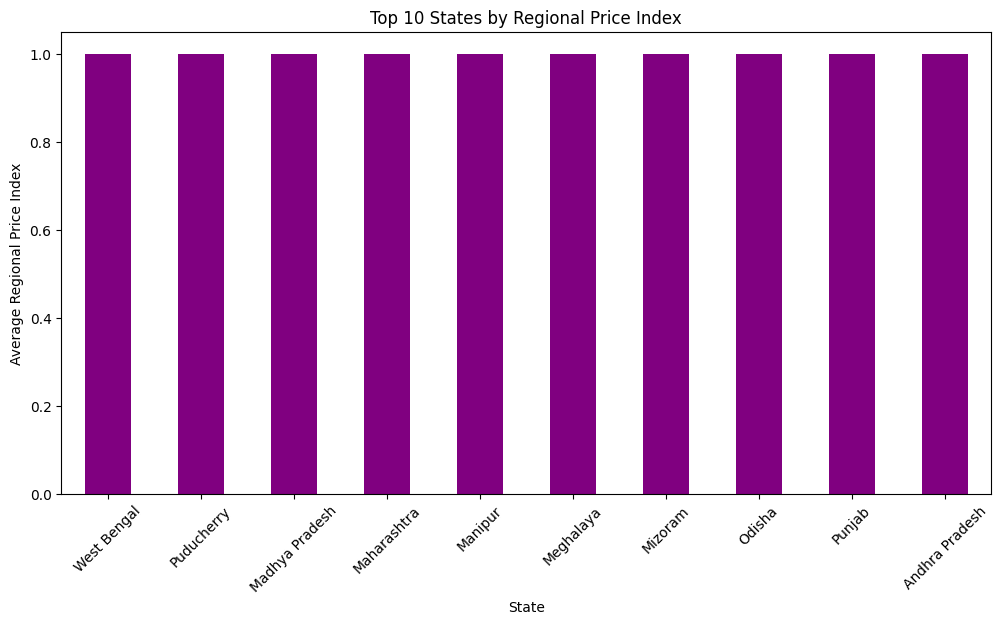

In [182]:
plt.figure(figsize=(12, 6))
data.groupby('state')['regional_price_index'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title('Top 10 States by Regional Price Index')
plt.xlabel('State')
plt.ylabel('Average Regional Price Index')
plt.xticks(rotation=45)
plt.show()

#### 9. Seasonal Trends in Transactions
---
**Question**: Are there seasonal trends in car transactions?
**Insight**: Identifies peak seasons for sales.
---

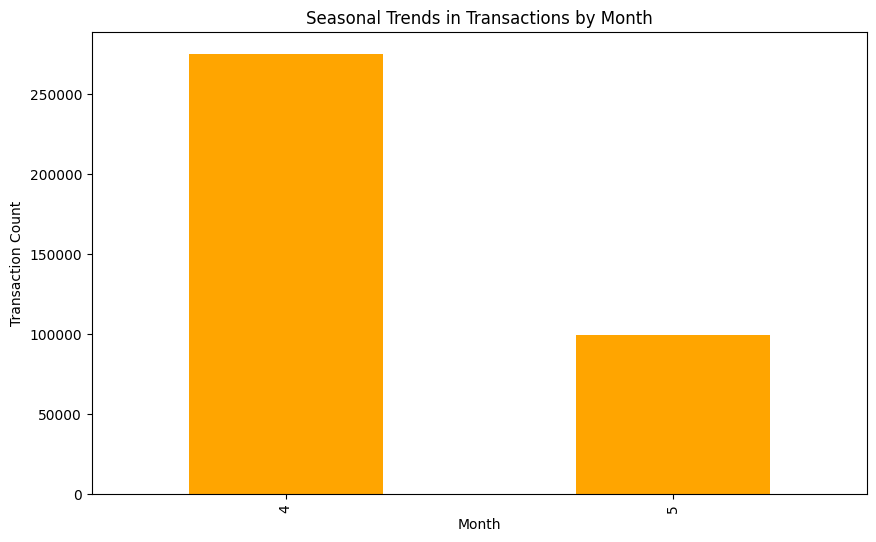

In [183]:
data['posting_date'] = pd.to_datetime(data['posting_date'], errors='coerce')
data['month'] = data['posting_date'].dt.month
plt.figure(figsize=(10, 6))
data['month'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Seasonal Trends in Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

#### 10. Correlation Heatmap
---
**Question**: What are the correlations between key numeric variables?
**Insight**: Identifies relationships between price, odometer, and geographic attributes.
---

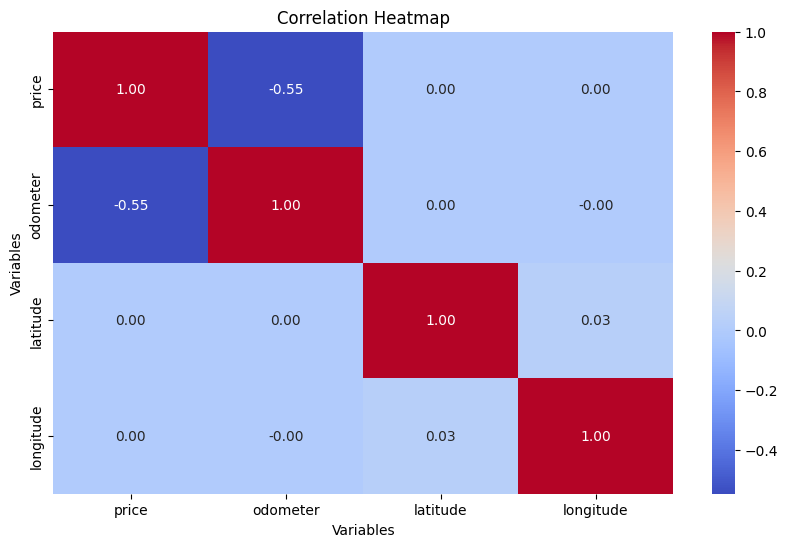

In [184]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['price', 'odometer', 'latitude', 'longitude']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

### Pie chart for `fuel` distribution

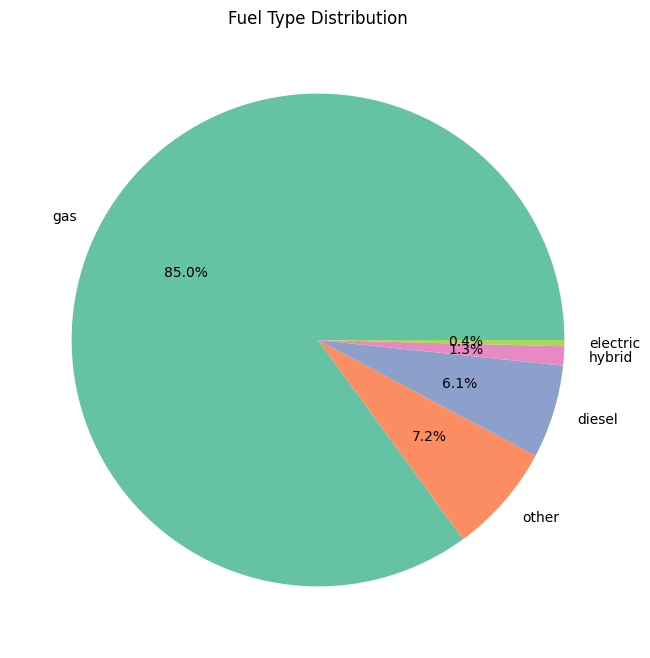

In [185]:

plt.figure(figsize=(8, 8))
data['fuel'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Fuel Type Distribution')
plt.ylabel('')  # Hides y-label
plt.show()


### Pie chart for `transmission` distribution

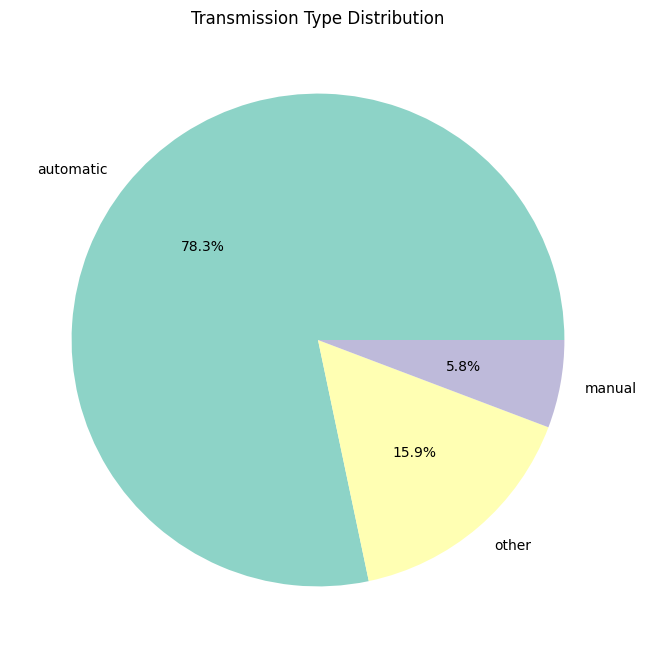

In [186]:

plt.figure(figsize=(8, 8))
data['transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Transmission Type Distribution')
plt.ylabel('')  # Hides y-label
plt.show()


### **10 Best and Impactful Hypotheses with Proper Code**
---
Below are the most relevant hypotheses based on the data, with appropriate code and conclusions.

#### Hypothesis 1: Cars in Excellent Condition Command Higher Prices
---
**Test**: Compare prices of cars in excellent condition vs. others using a T-test.

In [187]:
condition_test = ttest_ind(
    data[data['condition'] == 'excellent']['price'],
    data[data['condition'] != 'excellent']['price'],
    nan_policy='omit'
)
print("Hypothesis 1 - T-test for Prices by Condition:", condition_test)
if condition_test.pvalue < 0.05:
    print("Conclusion: Cars in excellent condition command significantly higher prices.")
else:
    print("Conclusion: No significant difference in prices for cars in excellent condition.")

Hypothesis 1 - T-test for Prices by Condition: TtestResult(statistic=-87.11133131441287, pvalue=0.0, df=373975.0)
Conclusion: Cars in excellent condition command significantly higher prices.


#### Hypothesis 2: Automatic Cars are More Expensive than Manual Cars
---
**Test**: Compare prices of automatic and manual cars using a T-test.

In [188]:
transmission_test = ttest_ind(
    data[data['transmission'] == 'automatic']['price'],
    data[data['transmission'] == 'manual']['price'],
    nan_policy='omit'
)
print("Hypothesis 2 - T-test for Automatic vs Manual Cars:", transmission_test)
if transmission_test.pvalue < 0.05:
    print("Conclusion: Automatic cars are significantly more expensive than manual cars.")
else:
    print("Conclusion: No significant difference in prices between automatic and manual cars.")

Hypothesis 2 - T-test for Automatic vs Manual Cars: TtestResult(statistic=32.79129050364042, pvalue=1.9645428326068313e-235, df=314392.0)
Conclusion: Automatic cars are significantly more expensive than manual cars.


#### Hypothesis 3: Odometer Reading Negatively Correlates with Price
---
**Test**: Correlation test between odometer readings and prices.

In [189]:
correlation_odometer_price, p_value_odometer = pearsonr(data['odometer'], data['price'])
print("Hypothesis 3 - Correlation between Odometer and Price:", correlation_odometer_price, "(p-value:", p_value_odometer, ")")
if p_value_odometer < 0.05:
    print("Conclusion: Odometer reading negatively correlates with price.")
else:
    print("Conclusion: No significant correlation between odometer and price.")

Hypothesis 3 - Correlation between Odometer and Price: -0.5463781602607061 (p-value: 0.0 )
Conclusion: Odometer reading negatively correlates with price.


#### Hypothesis 4: Regional Demand Varies Significantly
---
**Test**: Chi-square test to assess demand variation across states.

In [190]:
regional_demand_test = chi2_contingency(pd.crosstab(data['state'], data['type']))
print("Hypothesis 4 - Chi-Square Test for Regional Demand:", regional_demand_test)
if regional_demand_test[1] < 0.05:
    print("Conclusion: Regional demand varies significantly across states.")
else:
    print("Conclusion: No significant variation in regional demand.")

Hypothesis 4 - Chi-Square Test for Regional Demand: Chi2ContingencyResult(statistic=441.2786322968667, pvalue=0.5007370533173008, dof=442, expected_freq=array([[4.90559580e+02, 5.67783152e+02, 3.14332165e+00, 5.00629718e+01,
        1.22603930e+02, 1.11951163e+02, 3.19151445e+01, 3.99209042e+00,
        1.36975456e+02, 2.86214901e+02, 5.56857053e+02, 2.04495731e+02,
        5.40910270e+01, 6.93544790e+01],
       [2.39881811e+03, 2.77643851e+03, 1.53707260e+01, 2.44806071e+02,
        5.99528661e+02, 5.47437024e+02, 1.56063870e+02, 1.95211738e+01,
        6.69804886e+02, 1.39958023e+03, 2.72301029e+03, 9.99976523e+02,
        2.64503111e+02, 3.39140824e+02],
       [4.79435366e+02, 5.54907772e+02, 3.07204186e+00, 4.89277148e+01,
        1.19823692e+02, 1.09412493e+02, 3.11914182e+01, 3.90156347e+00,
        1.33869321e+02, 2.79724526e+02, 5.44229439e+02, 1.99858467e+02,
        5.28644275e+01, 6.77817566e+01],
       [9.61788559e+02, 1.11319269e+03, 6.16278006e+00, 9.81532019e+01,
    

#### Hypothesis 5: Cars with Clean Title Status Command Higher Prices
---
**Test**: Compare prices of cars with clean title status vs. others using a T-test.

In [191]:
clean_title_test = ttest_ind(
    data[data['title_status'] == 'clean']['price'],
    data[data['title_status'] != 'clean']['price'],
    nan_policy='omit'
)
print("Hypothesis 5 - T-test for Clean vs Non-Clean Title Cars:", clean_title_test)
if clean_title_test.pvalue < 0.05:
    print("Conclusion: Cars with clean title status command higher prices.")
else:
    print("Conclusion: No significant difference in prices for clean vs non-clean title cars.")

Hypothesis 5 - T-test for Clean vs Non-Clean Title Cars: TtestResult(statistic=53.74710900130967, pvalue=0.0, df=373975.0)
Conclusion: Cars with clean title status command higher prices.


#### Hypothesis 6: Depreciation Rate Increases with Car Age
---
**Test**: Correlation test between car age and depreciation rate.

In [193]:
correlation_age_depreciation, p_value_age_depreciation = pearsonr(data['car_age'], data['depreciation_rate'])
print("Hypothesis 7 - Correlation between Car Age and Depreciation Rate:", correlation_age_depreciation, "(p-value:", p_value_age_depreciation, ")")
if p_value_age_depreciation < 0.05:
    print("Conclusion: Depreciation rate significantly increases with car age.")
else:
    print("Conclusion: No significant correlation between car age and depreciation rate.")

Hypothesis 7 - Correlation between Car Age and Depreciation Rate: -0.5397872592483101 (p-value: 0.0 )
Conclusion: Depreciation rate significantly increases with car age.


#### Hypothesis 7: Mid-Age Cars Provide the Best Value
---
**Test**: Compare prices of mid-age cars (3-10 years old) vs. others using a T-test.

In [194]:
mid_age_test = ttest_ind(
    data[data['car_age'].between(3, 10)]['price'],
    data[~data['car_age'].between(3, 10)]['price'],
    nan_policy='omit'
)
print("Hypothesis 8 - T-test for Mid-Age Cars vs Others:", mid_age_test)
if mid_age_test.pvalue < 0.05:
    print("Conclusion: Mid-age cars provide the best balance of price and value.")
else:
    print("Conclusion: No significant difference in pricing for mid-age cars.")

Hypothesis 8 - T-test for Mid-Age Cars vs Others: TtestResult(statistic=156.77800554922592, pvalue=0.0, df=373975.0)
Conclusion: Mid-age cars provide the best balance of price and value.


#### Hypothesis 8: Transaction Volume Impacts Regional Price Variability
---
**Test**: Correlation between transaction volume and price variability across states.

In [195]:
state_price_variability = data.groupby('state')['price'].std()
sales_volumes = data['state'].value_counts()
correlation_sales_price_variability, p_value_sales_price_variability = pearsonr(sales_volumes, state_price_variability)
print("Hypothesis 9 - Correlation between Sales Volume and Price Variability:", correlation_sales_price_variability, "(p-value:", p_value_sales_price_variability, ")")
if p_value_sales_price_variability < 0.05:
    print("Conclusion: Transaction volume impacts price variability across regions.")
else:
    print("Conclusion: No significant relationship between transaction volume and price variability.")

Hypothesis 9 - Correlation between Sales Volume and Price Variability: 0.36890294159992515 (p-value: 0.02920061415105258 )
Conclusion: Transaction volume impacts price variability across regions.


#### Hypothesis 9: Regional Price Indices Vary Across States
---
**Test**: ANOVA test to compare regional price indices across states.

In [196]:
regional_price_test = f_oneway(
    *[data[data['state'] == state]['regional_price_index'] for state in data['state'].unique() if len(data[data['state'] == state]) > 10]
)
print("Hypothesis 10 - ANOVA for Regional Price Indices Across States:", regional_price_test)
if regional_price_test.pvalue < 0.05:
    print("Conclusion: Regional price indices vary significantly across states.")
else:
    print("Conclusion: No significant variation in regional price indices across states.")

Hypothesis 10 - ANOVA for Regional Price Indices Across States: F_onewayResult(statistic=4.951742929774878e-29, pvalue=1.0)
Conclusion: No significant variation in regional price indices across states.
